<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_010_ExamForEdu/_002_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()

X_features = dataset.data
y_label = dataset.target


In [ ]:
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


## 악성 / 양성

In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=.3, 
                                                    random_state=333)
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


In [ ]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
params = {
    'max_length': 3,
    'eta': .1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'early_stopping': 100
}
num_rounds = 333

In [ ]:
watch_list = [(dtrain, 'train'), (dtest, 'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달

xgb_model = xgb.train(params=params, dtrain=dtrain, 
                      num_boost_round=num_rounds,
                      early_stopping_rounds=100, evals=watch_list)

[0]	train-logloss:0.606382	eval-logloss:0.620963
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.535377	eval-logloss:0.561495
[2]	train-logloss:0.475709	eval-logloss:0.511867
[3]	train-logloss:0.424688	eval-logloss:0.468966
[4]	train-logloss:0.381139	eval-logloss:0.433053
[5]	train-logloss:0.343263	eval-logloss:0.401121
[6]	train-logloss:0.310341	eval-logloss:0.37486
[7]	train-logloss:0.281149	eval-logloss:0.351377
[8]	train-logloss:0.255757	eval-logloss:0.331384
[9]	train-logloss:0.232987	eval-logloss:0.313228
[10]	train-logloss:0.213298	eval-logloss:0.298809
[11]	train-logloss:0.195128	eval-logloss:0.28293
[12]	train-logloss:0.178063	eval-logloss:0.268837
[13]	train-logloss:0.16286	eval-logloss:0.257537
[14]	train-logloss:0.149183	eval-logloss:0.243602
[15]	train-logloss:0.136997	eval-logloss:0.231616
[16]	train-logloss:0.126074	eval-logloss:0.221478
[17]	train-lo

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

In [ ]:
def get_clf_eval(y_test, pred, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  roc_auc = roc_auc_score(y_test, pred_proba)

  print('오차 행렬')
  print(confusion, end='\n')
  print('정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nF1:{3:.4f}\nAUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
pred_probs = xgb_model.predict(dtest)
print("수행 결괏값을 10개만 표시 - 예측 확률 값으로 표시됨")
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 아니면 0 => sigmoid
preds = [1 if x > .5 else 0 for x in pred_probs]
print('예측값 : ', preds[:10])

수행 결괏값을 10개만 표시 - 예측 확률 값으로 표시됨
[0.993 0.001 1.    0.994 0.    1.    1.    0.999 0.001 1.   ]
예측값 :  [1, 0, 1, 1, 0, 1, 1, 1, 0, 1]


In [ ]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[ 56   3]
 [  3 109]]
정확도: 0.9649
정밀도: 0.9732
재현율: 0.9732
F1:0.9732
AUC: 0.9844


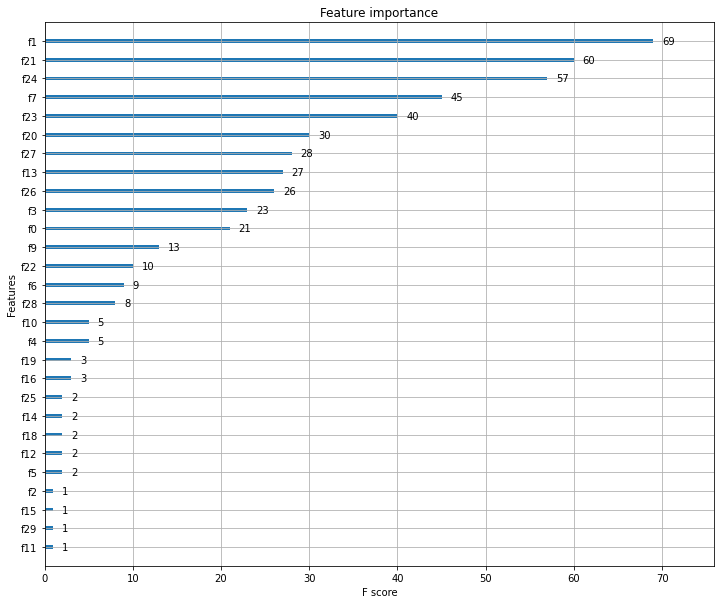

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
plot_importance(xgb_model, ax=ax)

## xgb.cv()

데이터 세트에 대한 교차 검증 수행 후 최적의 파라미터 확인

*GridSearchCV*와 비슷한 기능

In [ ]:
xgb.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False,
      folds=None, metrics=(), obj=None, feval=None, maximize=False, early_stopping_rounds=None,
      fpreproc=None, as_pandas=True,
      verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.606400,0.000104,0.611583,0.033311
1,0.535406,0.000166,0.543317,0.056958
2,0.475745,0.000241,0.487226,0.080569
3,0.424752,0.000280,0.440580,0.100424
4,0.381210,0.000340,0.400921,0.122862
5,0.343341,0.000401,0.366539,0.140473
6,0.310392,0.000445,0.336555,0.159085
7,0.281226,0.000475,0.310879,0.175661
8,0.255819,0.000518,0.287704,0.191371
9,0.233046,0.000553,0.268163,0.203693


In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)

w_preds =  xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [ ]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[ 56   3]
 [  4 108]]
정확도: 0.9591
정밀도: 0.9730
재현율: 0.9643
F1:0.9686
AUC: 0.9856


# 조기 중단 코드

In [ ]:
def run_early_stop(early_stopping_number):
  xgb_wrapper2 = XGBClassifier(n_estimators=400, learning_rate=.1, max_depth=4)
  evals= [(X_test, y_test)]

  xgb_wrapper2.fit(X_train, y_train,
                   early_stopping_rounds=early_stopping_number, 
                   eval_metric='logloss',
                   eval_set=evals, verbose=True)

  ws100_preds= xgb_wrapper2.predict(X_test)
  ws100_pred_proba = xgb_wrapper2.predict_proba(X_test)[:, 1]
  get_clf_eval(y_test, ws100_preds, ws100_pred_proba)
  plot_importance(xgb_wrapper2)

[0]	validation_0-logloss:0.620963
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.561495
[2]	validation_0-logloss:0.511867
[3]	validation_0-logloss:0.468966
[4]	validation_0-logloss:0.433053
[5]	validation_0-logloss:0.401121
[6]	validation_0-logloss:0.37486
[7]	validation_0-logloss:0.351377
[8]	validation_0-logloss:0.331384
[9]	validation_0-logloss:0.313227
[10]	validation_0-logloss:0.298809
[11]	validation_0-logloss:0.283179
[12]	validation_0-logloss:0.269226
[13]	validation_0-logloss:0.257648
[14]	validation_0-logloss:0.243728
[15]	validation_0-logloss:0.231748
[16]	validation_0-logloss:0.221616
[17]	validation_0-logloss:0.212968
[18]	validation_0-logloss:0.204467
[19]	validation_0-logloss:0.196926
[20]	validation_0-logloss:0.191224
[21]	validation_0-logloss:0.187092
[22]	validation_0-logloss:0.181653
[23]	validation_0-logloss:0.176531
[24]	validation_0-logloss:0.171209
[25]	validation_0-logloss:0.168487
[26]	validation_0-logloss:0.1642

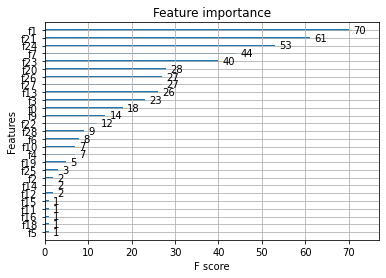

In [ ]:
run_early_stop(100)

[0]	validation_0-logloss:0.620963
Will train until validation_0-logloss hasn't improved in 3 rounds.
[1]	validation_0-logloss:0.561495
[2]	validation_0-logloss:0.511867
[3]	validation_0-logloss:0.468966
[4]	validation_0-logloss:0.433053
[5]	validation_0-logloss:0.401121
[6]	validation_0-logloss:0.37486
[7]	validation_0-logloss:0.351377
[8]	validation_0-logloss:0.331384
[9]	validation_0-logloss:0.313227
[10]	validation_0-logloss:0.298809
[11]	validation_0-logloss:0.283179
[12]	validation_0-logloss:0.269226
[13]	validation_0-logloss:0.257648
[14]	validation_0-logloss:0.243728
[15]	validation_0-logloss:0.231748
[16]	validation_0-logloss:0.221616
[17]	validation_0-logloss:0.212968
[18]	validation_0-logloss:0.204467
[19]	validation_0-logloss:0.196926
[20]	validation_0-logloss:0.191224
[21]	validation_0-logloss:0.187092
[22]	validation_0-logloss:0.181653
[23]	validation_0-logloss:0.176531
[24]	validation_0-logloss:0.171209
[25]	validation_0-logloss:0.168487
[26]	validation_0-logloss:0.164297

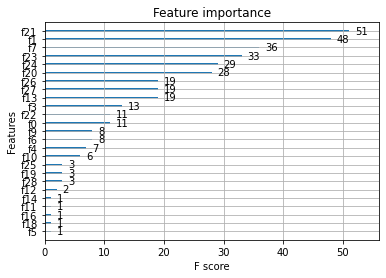

In [ ]:
run_early_stop(3)